In [1]:
import numpy as np
import cv2
import imutils
import glob
from PIL import Image, ImageEnhance, ImageFilter
from IPython.display import display

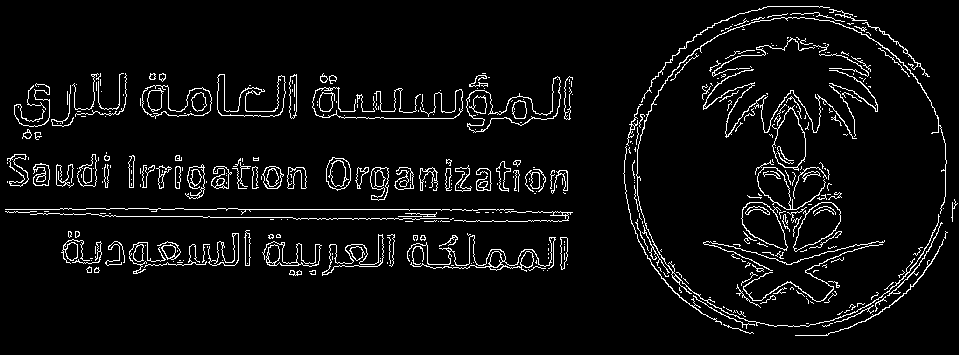

In [3]:
# load the image image, convert it to grayscale, and detect edges
#template = cv2.imread(r'/mnt/c/Users/yamshee.fatima/Desktop/image & OCR/multiscale-template-matching/multiscale-template-matching/cod_logo.png')
template = cv2.imread(r'/mnt/d/BSF/template/tem1.png')

template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
display(Image.fromarray(template))

In [10]:
# loop over the images to find the template in

imagePath=r'/mnt/d/BSF/SaudiBank/LG_image/arabic/No-Table/A5.jpg'
# load the image, convert it to grayscale, and initialize the bookkeeping variable to keep track of the matched region
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
found = None
 
    # loop over the scales of the image
for scale in np.linspace(0.2, 1.0, 20)[::-1]:
        # resize the image according to the scale, and keep track of the ratio of the resizing
        resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
        r = gray.shape[1] / float(resized.shape[1])
 
        # if the resized image is smaller than the template, then break from the loop
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break
        # detect edges in the resized, grayscale image and apply template matching to find the template in the image
        edged = cv2.Canny(resized, 50, 200)
        result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
 
        # check to see if the iteration should be visualized
        #if True:
            # draw a bounding box around the detected region
            #clone = np.dstack([edged, edged, edged])
            #cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),(maxLoc[0] + tW, maxLoc[1] + tH), (0, 0, 255), 2)
            #display(Image.fromarray(clone))
 
        # if we have found a new maximum correlation value, then update the bookkeeping variable
        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)
 
    

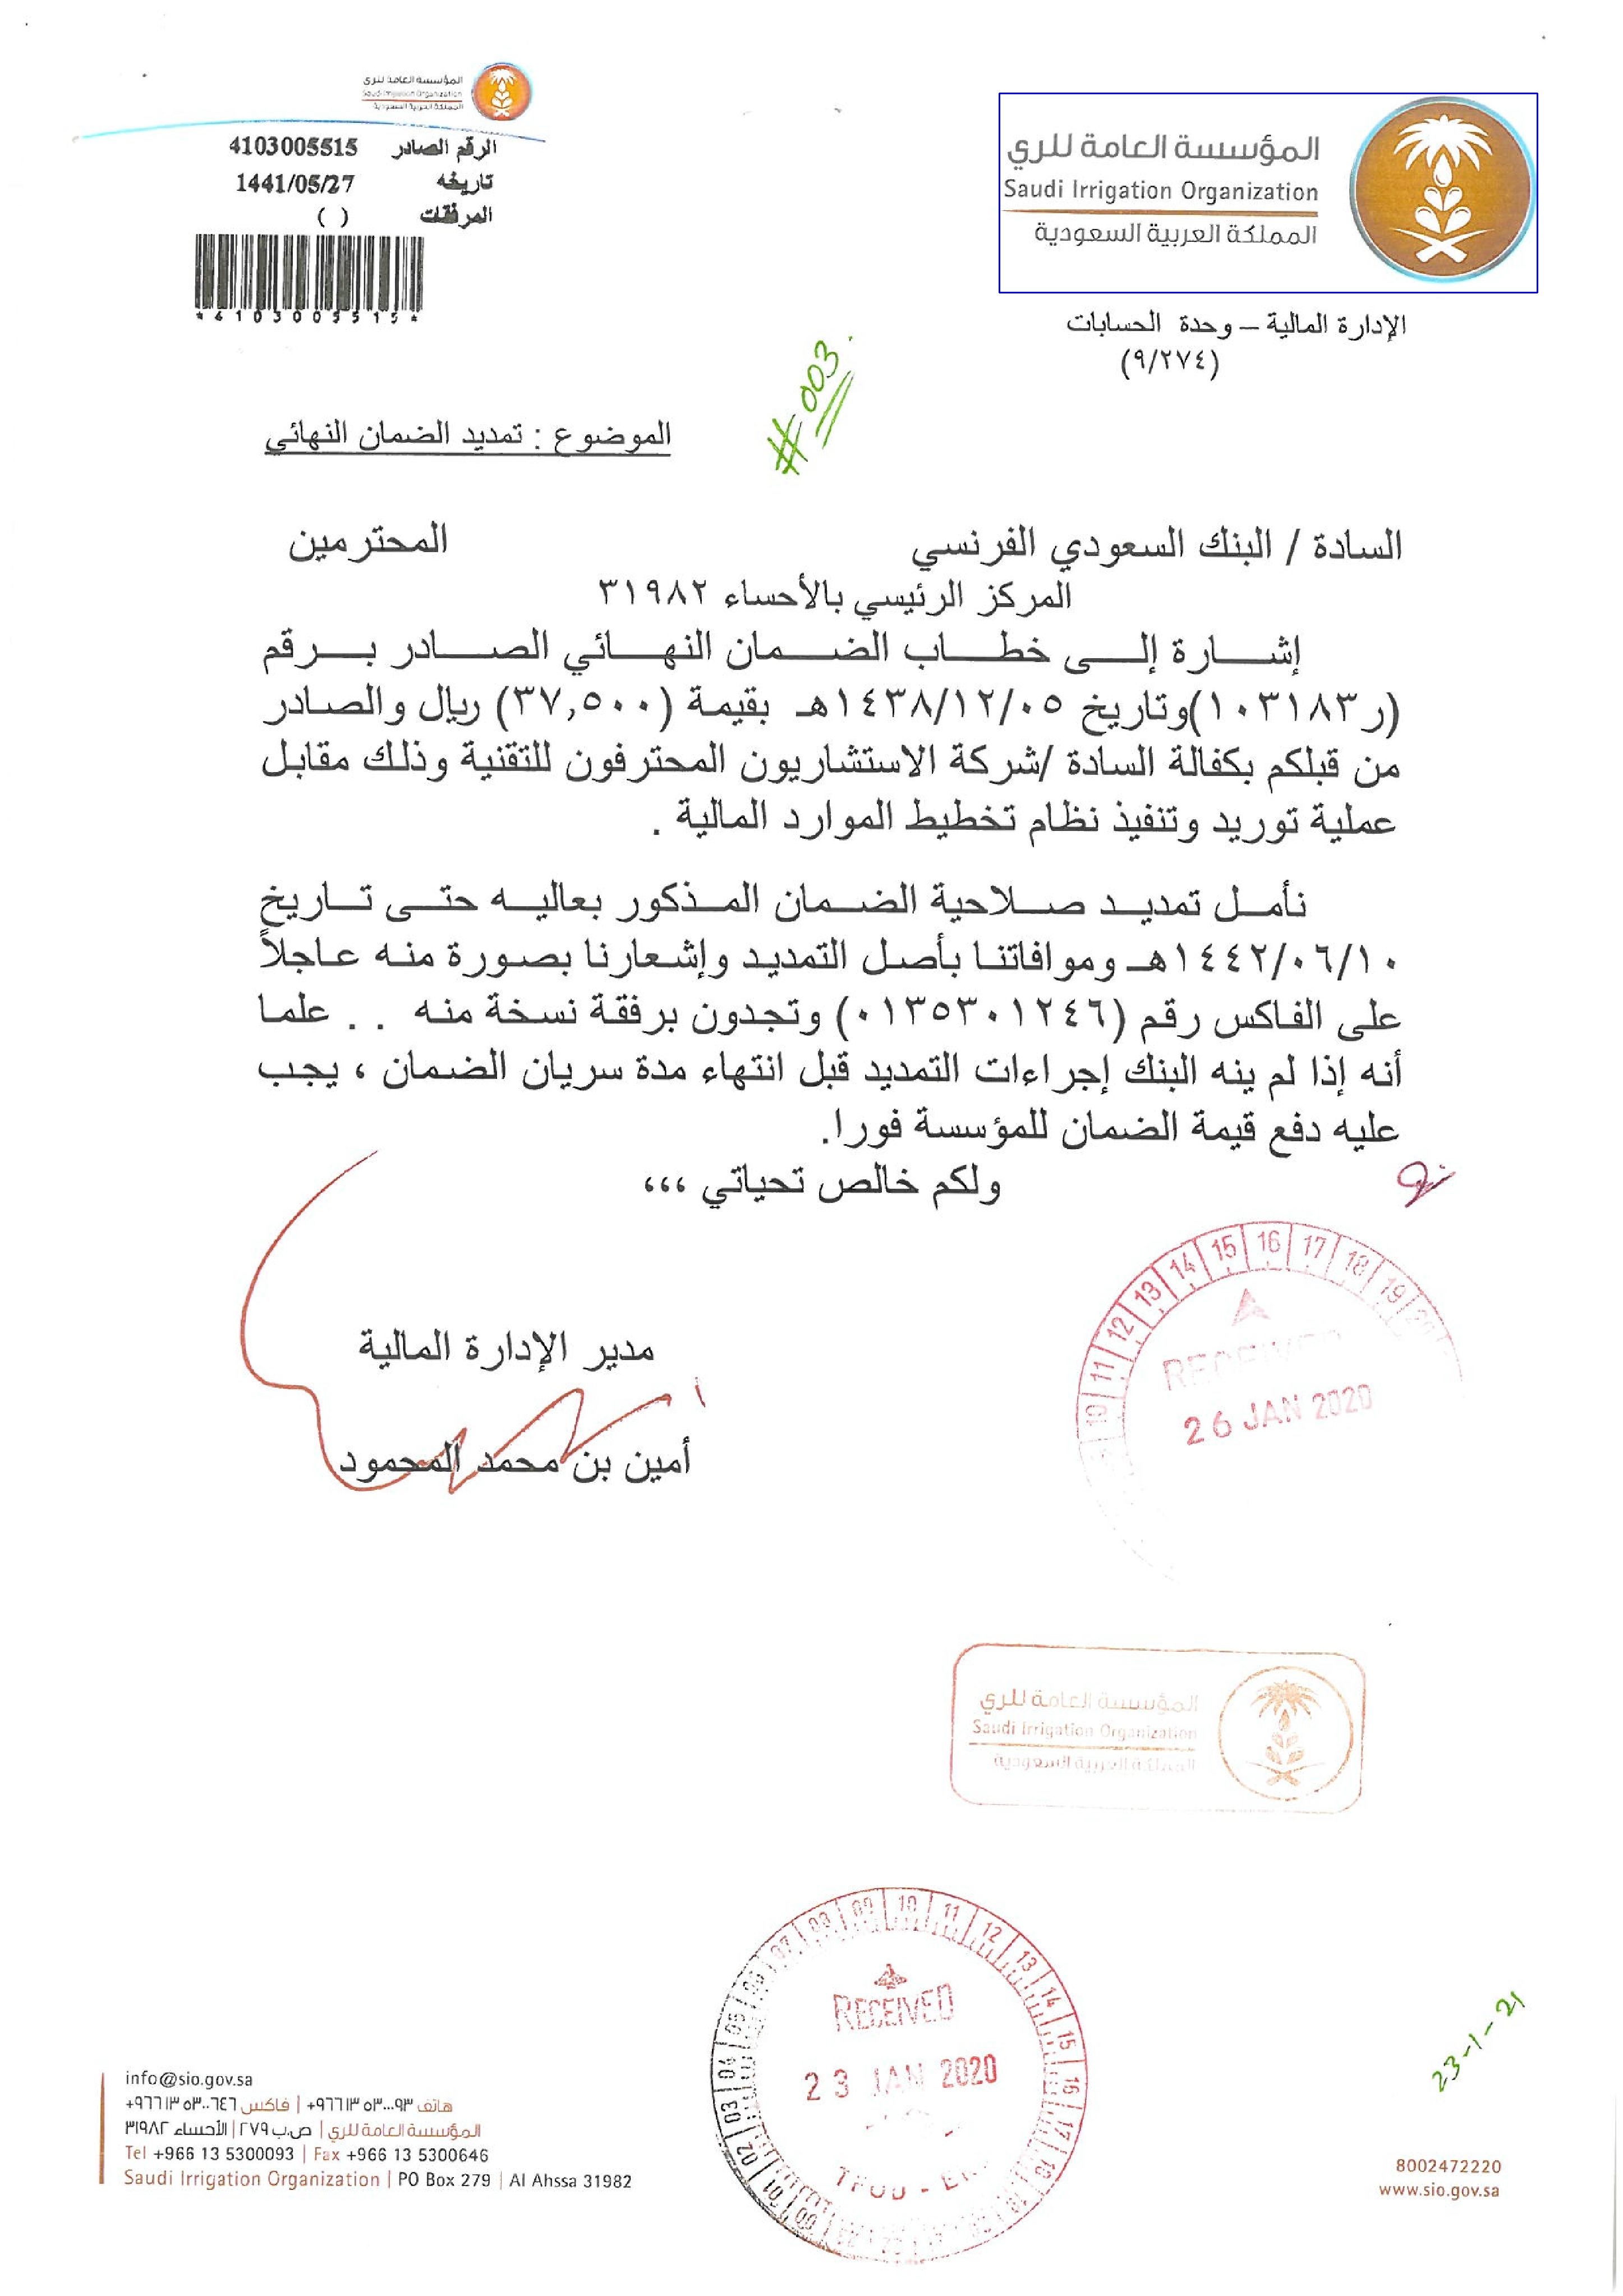

In [7]:
# unpack the bookkeeping variable and compute the (x, y) coordinates of the bounding box based on the resized ratio
(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
 
    # draw a bounding box around the detected result and display the image
cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
display(Image.fromarray(image))

In [11]:
def template_matching(image,template):
    # template = cv2.imread(r'/mnt/d/temp1.png')
    # imagePath=r'/mnt/d/0_Prcn 27.10.19_0001.pdf.jpg'
    # load the image, convert it to grayscale, and initialize the bookkeeping variable to keep track of the matched region
    image = cv2.imread(imagePath)
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    template = cv2.Canny(template, 50, 200)
    (tH, tW) = template.shape[:2]
    display(Image.fromarray(template))
    

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    found = None

    # loop over the scales of the image
    for scale in np.linspace(0.2, 1.0, 20)[::-1]:
        # resize the image according to the scale, and keep track of the ratio of the resizing
        resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
        r = gray.shape[1] / float(resized.shape[1])

        # if the resized image is smaller than the template, then break from the loop
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break
        # detect edges in the resized, grayscale image and apply template matching to find the template in the image
        edged = cv2.Canny(resized, 50, 200)
        result = cv2.matchTemplate(edged, template, cv2.TM_CCOEFF)
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

        # if we have found a new maximum correlation value, then update the bookkeeping variable
        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)
        
    
    # unpack the bookkeeping variable and compute the (x, y) coordinates of the bounding box based on the resized ratio
    (_, maxLoc, r) = found
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))
 
    # draw a bounding box around the detected result and display the image
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
   # display(Image.fromarray(image))
    print(startX, startY, endX, endY)
    return (startX, startY, endX, endY)

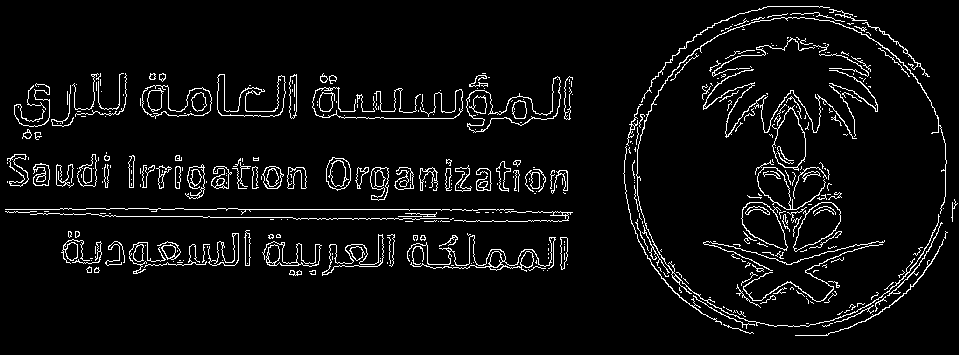

1775 161 2734 516
(1775, 161, 2734, 516)


In [12]:
template = cv2.imread(r'/mnt/d/BSF/template/tem1.png')
imagePath=r'/mnt/d/BSF/SaudiBank/LG_image/arabic/No-Table/A5.jpg'

found=template_matching(image,template)
print(found)

In [ ]:
(191, 1824, 545, 1873)